In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_CVD_data.csv')

In [5]:
df.index = df.index +1
df = df.rename_axis("Patient")
df.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Patient,,,,,,,,,,,,,,,,,,,
1,Poor,<=2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,No,Yes,Yes,Yes
2,Very Good,<=1 year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,No,Yes,No,Yes
3,Very Good,<=1 year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,Yes,Yes,Yes,Yes


In [6]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
# See how Alcohol Consumption and Smoking has affected the general health..

In [18]:
df[['General_Health','Smoking_History','Alcohol_Consumption']]

,General_Health,Smoking_History,Alcohol_Consumption
Patient,,,
1,Poor,Yes,No
2,Very Good,No,No
3,Very Good,No,Yes
4,Poor,No,No
5,Good,Yes,No
...,...,...,...
308850,Very Good,No,Yes
308851,Fair,No,Yes
308852,Very Good,Yes,Yes


In [24]:
summary_table = df.groupby(['Alcohol_Consumption', 'Smoking_History', 'General_Health']).size().unstack(fill_value=0)


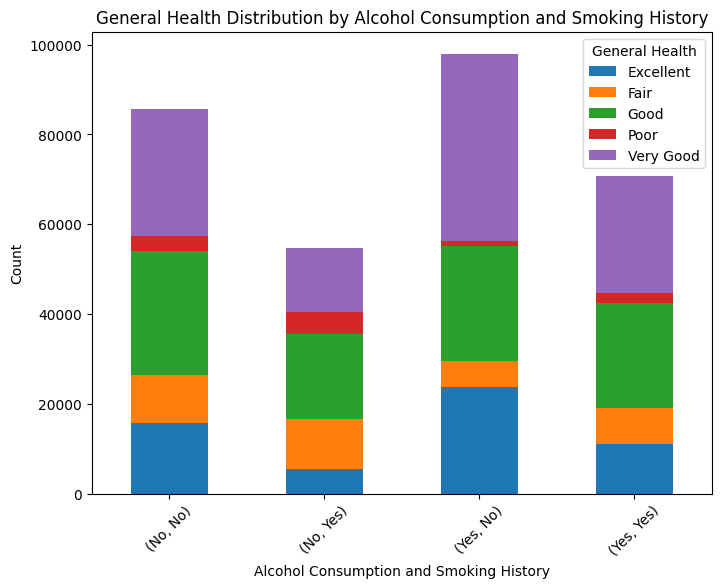

In [30]:
summary_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('General Health Distribution by Alcohol Consumption and Smoking History')
plt.xlabel('Alcohol Consumption and Smoking History')
plt.ylabel('Count')
plt.legend(title='General Health')
plt.xticks(rotation=45)
plt.show()

In [33]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c7/09/c07278f3c75018f80288032b09acd76aa4c2056cdb7fa9b0a145bac6b06b/scipy-1.11.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 6.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
from scipy.stats import chi2_contingency
import numpy as np

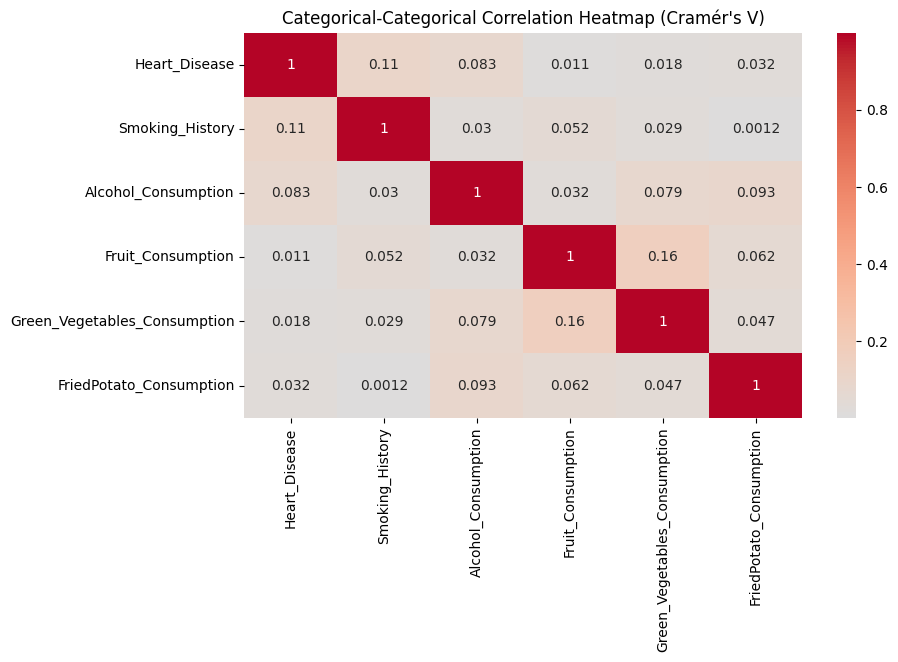

In [76]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

cat_columns = ['Heart_Disease','Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

corr_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix.values)

plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title('Categorical-Categorical Correlation Heatmap (Cramér\'s V)')
plt.show()

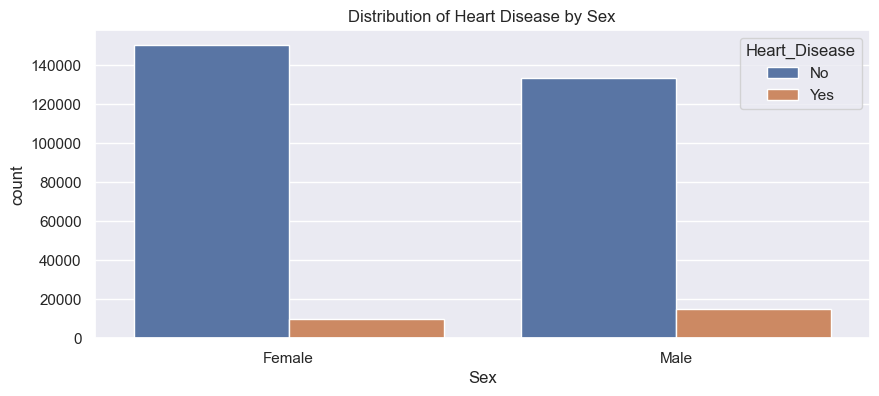

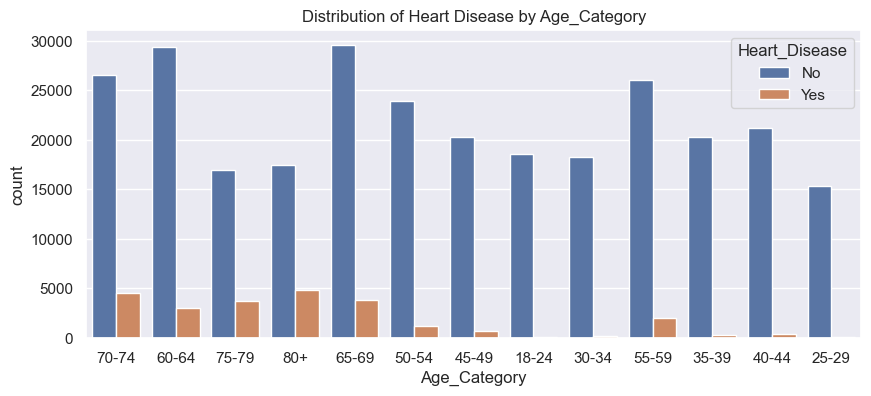

In [85]:
categorical_columns = ['Sex', 'Age_Category']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.set(style="darkgrid")
    sns.countplot(x=col, hue='Heart_Disease', data=df)
    plt.title(f'Distribution of Heart Disease by {col}')
    
    plt.show()

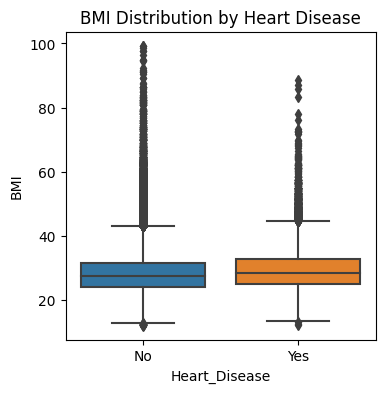

In [71]:
continuous_column = ['BMI']

for col in continuous_column:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='Heart_Disease', y=col, data=df)
    plt.title(f'{col} Distribution by Heart Disease')
    plt.show()


In [86]:
df.describe()

,Height_(cm),Weight_(kg),BMI
count,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211
std,10.658026,21.343210,6.522323
min,91.000000,24.950000,12.020000
25%,163.000000,68.040000,24.210000
50%,170.000000,81.650000,27.440000
75%,178.000000,95.250000,31.850000
max,241.000000,293.020000,99.330000


Text(0.5, 1.0, 'BMI')

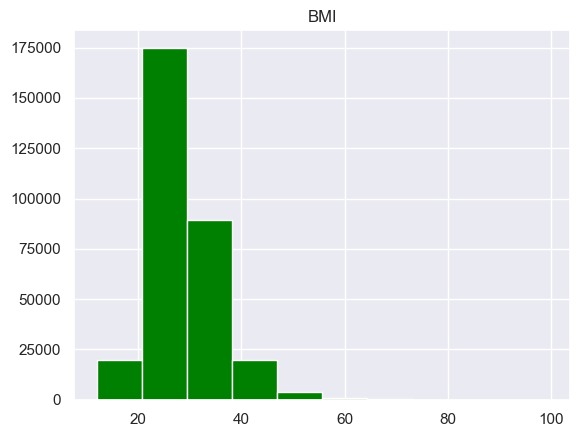

In [95]:
df['BMI'].hist(color='green')
plt.title('BMI')